In [1]:
import os
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
variable_path_base = r'../data/variables'
variable_files_pattern = f'var-dia-*.zip'

In [3]:
variable_path_base = variable_path_base.split('/')
variable_files = glob.glob(os.path.join(*variable_path_base, variable_files_pattern))
print(variable_files)

['..\\data\\variables\\var-PTPM_CON.zip', '..\\data\\variables\\var-PT_10_TT_D.zip', '..\\data\\variables\\var-Q_MEDIA_D.zip', '..\\data\\variables\\var-Q_MN_D.zip', '..\\data\\variables\\var-Q_MX_D.zip', '..\\data\\variables\\var-TMN_CON.zip', '..\\data\\variables\\var-TMX_CON.zip']


In [4]:
dtypes = {
    'CodigoEstacion':'string','Etiqueta':'category','Fecha': 'string',
    #'IdParametro':'category','DescripcionSerie':'category','Frecuencia':'category','Grado':'category','Calificador':'category','NivelAprobacion':'category',
}

usecols = {
    'CodigoEstacion','Etiqueta', 'Fecha','Valor'
    #'IdParametro','DescripcionSerie','Frecuencia','Grado','Calificador','NivelAprobacion'
}
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M')


In [5]:
def groupVariableByMonth(f):
    print(f'Archivo: {f}')
    print(f'Leyendo...')
    df = pd.read_csv(f, dtype = dtypes, parse_dates = ['Fecha'], date_parser = dateparse)#, index_col = ['Fecha', 'CodigoEstacion'])
    
    etiqueta = df.iat[0,1]
    print(f'Etiqueta leída: {etiqueta}')
    
    print(df.shape)
    #print(df.dtypes)
    #print(df.info())
    print(df.head())
    
    print(f'Agrupando por mes...')
    #.dt.to_timestamp()
    dfm = df.groupby([df.CodigoEstacion,df.Etiqueta,df.Fecha.dt.to_period('M')]).Valor.agg(['min','mean','median','max']).dropna().reset_index()
    print(dfm.shape)
    #print(dfm.dtypes)
    #print(dfm.info())
    print(dfm.head())
    
    p = os.path.join(*variable_path_base, f'var-men-{etiqueta}.csv')
    print(f'Guardando en {p}...')
    dfm.to_csv(p, index = False)
    print(f'*** guardado ***')
    
    #dfm.boxplot()
    #plt.title(f'{etiqueta}')

    #p = os.path.join(*variable_path_base, 'images', f'var-men-{etiqueta}.png')
    #plt.savefig(p)

Archivo: ..\data\variables\var-TMX_CON.zip
Leyendo...


<ipython-input-4-c136bba1d836>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M')


Etiqueta leída: TMX_CON
(2525321, 4)
  CodigoEstacion Etiqueta      Fecha  Valor
0       11025010  TMX_CON 1991-01-01   20.0
1       11025010  TMX_CON 1991-01-02   20.4
2       11025010  TMX_CON 1991-01-03   20.6
3       11025010  TMX_CON 1991-01-04   21.8
4       11025010  TMX_CON 1991-01-05   21.2
Agrupando por mes...
(89710, 7)
  CodigoEstacion Etiqueta    Fecha   min       mean  median   max
0       11025010  TMX_CON  1991-01  18.4  21.341935    21.6  24.4
1       11025010  TMX_CON  1991-02  18.9  21.696429    21.5  24.8
2       11025010  TMX_CON  1991-03  16.6  21.222581    21.2  23.6
3       11025010  TMX_CON  1991-04  17.6  20.873333    21.1  24.0
4       11025010  TMX_CON  1991-05  16.4  20.893333    21.2  23.6
Guardando en ..\data\variables\var-men-TMX_CON.csv...
*** guardado ***


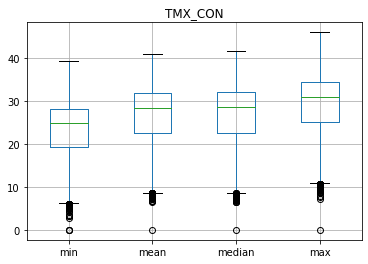

In [6]:
for f in variable_files[-1:]:
    groupVariableByMonth(f)


In [7]:
#estacion = '13067020'
#year = 2005
#print(dfm.loc[(dfm.CodigoEstacion == estacion) & (dfm.Fecha.dt.year == year)].head(2))
#print(df[(df.CodigoEstacion == estacion) & (df.Fecha.dt.year == year)].head(2))